# Assignment 2: Suervised Learning

### Jon Burke
#### R00043561

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time as time

### Task 1: Pre-Processing and Visualisation

##### I loaded the dataset using Pandas and split into two different dataframes.  One for the labels and one for the features. 

In [3]:
df = pd.read_csv("/Users/jon/Desktop/ML_Assignment2/Data/product_images.csv") #loading the dataset

In [4]:
df.head(5) #preview of data.  

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_label = df[["label"]] #Label dataset 
df_pixel = df.drop(columns=["label"]) #features dataset

In [5]:
df_label.head() #preview 

,label
0,1
1,1
2,1
3,0
4,0


##### Using the matplotlib image function and by transforming the features dataset into a 28 *28  matix I was able to plot each feature

In [6]:
#fuction to plot features
def get_feat(rows): #input row from feature data
    image1 = rows # assigning name
    image1 = image1.reshape((28,28)) # reshaping to a 28*28 matrix
    plt.imshow(image1, cmap="gray") #plotting imagein in grayscale
    plt.show() #show image

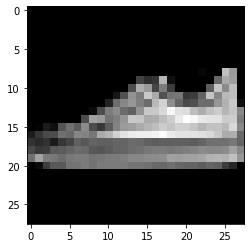

In [7]:
shoe = df_pixel.iloc[3].values # iloc to secect a row from the dataframe
get_feat(shoe) # putting row into function

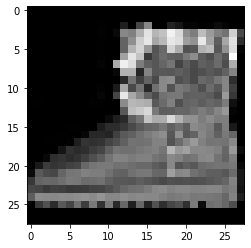

In [8]:
boot = df_pixel.iloc[1].values
get_feat(boot)

##### Printing the length of each label filtered by 1 or 0 to get the number of boots and sneakers in the dataset

In [101]:
print(" Number of sneakers in the dataset:", len(df[df["label"] == 0]), "\n",
     "Number of boots in the dataset:", len(df[df["label"] == 1])) #len function to get number of each label

 Number of sneakers in the dataset: 7000 
 Number of boots in the dataset: 7000


##### To get a sample subset I created function that allows the user to input a number which will return the number of both the label dataframe and the features dataframe.  These are labelled X and y for the our model.

In [10]:
def get_sample(n): #creating function
    y = df_label.head(n).values.ravel() # returns number of samples by getting the head of the data.  I used values and ravel to formate the data correctly for my model
    X = df_pixel.head(n).values
    return X,y

In [20]:
X,y=get_sample(1000) #sample of 1000

In [21]:
len(X) #checking output

1000

## Task 2: Perceptron

To create the this  model I used the perceptron model from sklearn.  I created a function that will allow me to put in an X and y for features and labels.  Using Kfold from sklearn I am able to train the model by splitting the data a specified number of times.  Using a for loop I can iterate through each fold training and fitting the model.  Outputting a confusion matrix and accuracy score for each fold.   

Using the time function I can time how long each train iteration took as well as each predict by getting the time at the beginning and the end of each loop and taking the start time from the end time.   

In [12]:
#importing libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import mean

In [19]:
#Creating model function

def model_perceptron(X,y): #input x and y
    clf = Perceptron() #percetron model
    kf = KFold(n_splits=10, random_state=42) #10 splits using kfold
    i = 0 #setting i to 0 to return each fold for loop
    train_time = list(range(0,10)) #list range 10 for each fold to return each train time
    predict_time = list(range(0,10)) #list for each prediction time
    acc_score = list(range(0,10)) #each acc score
    for train_indices, test_indices in kf.split(X,y): #loop for each fold
        start1 = time.time() #starting time 
        clf.fit(X[train_indices], y[train_indices]) # fit model for each fold
        end1 = time.time() #end time
        
        start2 = time.time() # start time
        y_pred = clf.predict(X[test_indices]) # predict for each fold
        end2 = time.time() #end time

        print ("","FOLD", i+1, "\n", 
               "Confustion matrix:","\n", 
               confusion_matrix(y[test_indices], y_pred),"\n",
              "Accuaracy Score:", accuracy_score(y[test_indices], y_pred), 
               "\n" ) # return a confusion matrix and acc score for each fold
        
        accu =  accuracy_score(y[test_indices], y_pred) # store accuracy score to allow for compare each loop/fold 
        acc_score[i] = accu 
        
        time1 =  end1 - start1
        time2 = end2 - start2
        train_time[i] = time1 #storing each train time to allow for comparisong of each fold
        predict_time[i] = time2  #storing each predict time to allow for comparison of each fold
        i=i+1
        
    print("\n")
    print ("Mean Accuracy score:", round(mean(acc_score),3)) # function returns mean accscore of all folds
    print ("Max Accuracy score:", round(max(acc_score),3)) #max score of all folds
    print ("Min Accuracy score:", round(min(acc_score),3), "\n") #min socre of all folds
    
    print ("Mean train time:", round(mean(train_time),8)) #mean train time of all folds
    print ("Max train time:", round(max(train_time),8)) #max train time
    print ("Min train time:", round(min(train_time),8), "\n") #min train time
    
    print ("Mean predict time:", round(mean(predict_time),8))#mean train time 
    print ("Max predict time:", round(max(predict_time),8))#max
    print ("Min predict time:", round(min(predict_time),8), "\n")#min
    
    mean_acc_score = mean(acc_score)
    max_acc_score = max(acc_score)
    min_acc_score = min(acc_score)
    mean_train_time = mean(train_time)
    mean_test_time = mean(predict_time)
    
    return mean_acc_score,  max_acc_score, min_acc_score, mean_train_time, mean_test_time #fuction returns the mean min
#max of acc and mean times for train and prediction in order to compare each fold and get an overview of model
    

##### Looking at our model output it scores verly highly with a mean accuracy score of 0.93

In [22]:
model_perceptron(X,y) # inputting x and y into model

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[50  1]
 [ 6 43]] 
 Accuaracy Score: 0.93 

 FOLD 2 
 Confustion matrix: 
 [[49  5]
 [ 0 46]] 
 Accuaracy Score: 0.95 

 FOLD 3 
 Confustion matrix: 
 [[50  0]
 [ 3 47]] 
 Accuaracy Score: 0.97 

 FOLD 4 
 Confustion matrix: 
 [[53  0]
 [12 35]] 
 Accuaracy Score: 0.88 

 FOLD 5 
 Confustion matrix: 
 [[52  2]
 [ 1 45]] 
 Accuaracy Score: 0.97 

 FOLD 6 
 Confustion matrix: 
 [[48  1]
 [ 5 46]] 
 Accuaracy Score: 0.94 

 FOLD 7 
 Confustion matrix: 
 [[48  7]
 [ 1 44]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[49  1]
 [ 8 42]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[42  5]
 [ 4 49]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.934
Max Accuracy score: 0.97
Min Accuracy score: 0.88 

Mean train time: 0.03277609
Max train time: 0.06419587
Min train time: 0.01709914 

Mean predict time: 0.00101871
Max predict time: 0.00496697
Min predict tim

(0.9339999999999999, 0.97, 0.88, 0.03277609348297119, 0.0010187149047851563)

### Perceptron model Resutls

By creating a loop that outputs different sample sizes of X,y from the get_sample function created earlier I can imput these different sample sizes into my model and append each result to an empty list.  As there will be many outputs the easies way to compare these is to plot the results for each sample size.  I can create different plots to compare the accuracy socre, train time and predict time for each sample size

Looking at the graphs below we can see the mean accuracy score for each fold almost maxes out at around 4000 samples.  The score at 14000 is slightly higher but it is not so beneficial to off set the longer train and predict time.  In this case however it was very fast model.  For 14000 samples the average train time was 0.4 seconds so for data time to train and predict the model is not a concern

In [34]:
per_acc = [] #creating empty lists for each output. One for mean accuracy, max acc, min acc, mean train time and mean predict time
per_max_acc = []
per_min_acc = []
per_train = []
per_predict = []
per_range = []

for r in range(1000, 14001, 1000): # loop to output samples sizes min 1000 and max full dataset in steps of 1000.  
    X,y=get_sample(r) # output for X and y
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_perceptron(X,y) #put each sample size into model and store the results 
    
    per_range.append(r) #each result is appended to the empty list
    per_acc.append(round(ma,2)) #round acc score
    per_max_acc.append(round(mxa,2)) 
    per_min_acc.append(round(mna,2))
    per_train.append(round(mt,8))# round time 
    per_predict.append(round(mp,8))


SAMPLE SIZE: 1000
 FOLD 1 
 Confustion matrix: 
 [[50  1]
 [ 6 43]] 
 Accuaracy Score: 0.93 

 FOLD 2 
 Confustion matrix: 
 [[49  5]
 [ 0 46]] 
 Accuaracy Score: 0.95 

 FOLD 3 
 Confustion matrix: 
 [[50  0]
 [ 3 47]] 
 Accuaracy Score: 0.97 

 FOLD 4 
 Confustion matrix: 
 [[53  0]
 [12 35]] 
 Accuaracy Score: 0.88 

 FOLD 5 
 Confustion matrix: 
 [[52  2]
 [ 1 45]] 
 Accuaracy Score: 0.97 



/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 6 
 Confustion matrix: 
 [[48  1]
 [ 5 46]] 
 Accuaracy Score: 0.94 

 FOLD 7 
 Confustion matrix: 
 [[48  7]
 [ 1 44]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[49  1]
 [ 8 42]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[42  5]
 [ 4 49]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.934
Max Accuracy score: 0.97
Min Accuracy score: 0.88 

Mean train time: 0.03233602
Max train time: 0.06850576
Min train time: 0.02216601 

Mean predict time: 0.00062461
Max predict time: 0.00161386
Min predict time: 0.0004313 

SAMPLE SIZE: 2000
 FOLD 1 
 Confustion matrix: 
 [[93 12]
 [ 1 94]] 
 Accuaracy Score: 0.935 



/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 2 
 Confustion matrix: 
 [[96  7]
 [ 0 97]] 
 Accuaracy Score: 0.965 

 FOLD 3 
 Confustion matrix: 
 [[98  5]
 [ 6 91]] 
 Accuaracy Score: 0.945 

 FOLD 4 
 Confustion matrix: 
 [[85 16]
 [ 0 99]] 
 Accuaracy Score: 0.92 

 FOLD 5 
 Confustion matrix: 
 [[96  1]
 [13 90]] 
 Accuaracy Score: 0.93 

 FOLD 6 
 Confustion matrix: 
 [[91 18]
 [ 1 90]] 
 Accuaracy Score: 0.905 

 FOLD 7 
 Confustion matrix: 
 [[ 86   7]
 [  5 102]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[95  1]
 [ 6 98]] 
 Accuaracy Score: 0.965 

 FOLD 9 
 Confustion matrix: 
 [[107   2]
 [  7  84]] 
 Accuaracy Score: 0.955 

 FOLD 10 
 Confustion matrix: 
 [[ 78  10]
 [  0 112]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.941
Max Accuracy score: 0.965
Min Accuracy score: 0.905 

Mean train time: 0.07482538
Max train time: 0.10669303
Min train time: 0.04417205 

Mean predict time: 0.00096667
Max predict time: 0.00205803
Min predict time: 0.00073528 

SAMPLE SIZE: 3000
 FOLD 1 
 Confustion ma

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 2 
 Confustion matrix: 
 [[144  12]
 [  2 142]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 3 
 Confustion matrix: 
 [[142   9]
 [  6 143]] 
 Accuaracy Score: 0.95 

 FOLD 4 
 Confustion matrix: 
 [[132  24]
 [  2 142]] 
 Accuaracy Score: 0.9133333333333333 

 FOLD 5 
 Confustion matrix: 
 [[137   6]
 [  7 150]] 
 Accuaracy Score: 0.9566666666666667 

 FOLD 6 
 Confustion matrix: 
 [[140  15]
 [  2 143]] 
 Accuaracy Score: 0.9433333333333334 

 FOLD 7 
 Confustion matrix: 
 [[119  19]
 [  1 161]] 
 Accuaracy Score: 0.9333333333333333 

 FOLD 8 
 Confustion matrix: 
 [[152   2]
 [  9 137]] 
 Accuaracy Score: 0.9633333333333334 

 FOLD 9 
 Confustion matrix: 
 [[141  20]
 [  2 137]] 
 Accuaracy Score: 0.9266666666666666 

 FOLD 10 
 Confustion matrix: 
 [[149  12]
 [  3 136]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.946
Max Accuracy score: 0.97
Min Accuracy score: 0.913 

Mean train time: 0.13381002
Max train time: 0.16230297
Min train time: 0.10776782 

Mean predict ti

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[200   8]
 [  6 186]] 
 Accuaracy Score: 0.965 

 FOLD 2 
 Confustion matrix: 
 [[184  20]
 [  5 191]] 
 Accuaracy Score: 0.9375 

 FOLD 3 
 Confustion matrix: 
 [[199   7]
 [ 13 181]] 
 Accuaracy Score: 0.95 

 FOLD 4 
 Confustion matrix: 
 [[187   2]
 [ 25 186]] 
 Accuaracy Score: 0.9325 

 FOLD 5 
 Confustion matrix: 
 [[182  15]
 [  1 202]] 
 Accuaracy Score: 0.96 

 FOLD 6 
 Confustion matrix: 
 [[195   9]
 [ 15 181]] 
 Accuaracy Score: 0.94 

 FOLD 7 
 Confustion matrix: 
 [[201  11]
 [ 12 176]] 
 Accuaracy Score: 0.9425 

 FOLD 8 
 Confustion matrix: 
 [[167  37]
 [  0 196]] 
 Accuaracy Score: 0.9075 

 FOLD 9 
 Confustion matrix: 
 [[205   7]
 [  9 179]] 
 Accuaracy Score: 0.96 

 FOLD 10 
 Confustion matrix: 
 [[188   9]
 [  6 197]] 
 Accuaracy Score: 0.9625 



Mean Accuracy score: 0.946
Max Accuracy score: 0.965
Min Accuracy score: 0.908 

Mean train time: 0.1439605
Max train time: 0.22374511
Min train time: 0.10142303 

Mean predict time: 0.0

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[224  38]
 [  0 238]] 
 Accuaracy Score: 0.924 

 FOLD 2 
 Confustion matrix: 
 [[244   3]
 [ 32 221]] 
 Accuaracy Score: 0.93 

 FOLD 3 
 Confustion matrix: 
 [[234  18]
 [  9 239]] 
 Accuaracy Score: 0.946 

 FOLD 4 
 Confustion matrix: 
 [[233  10]
 [ 16 241]] 
 Accuaracy Score: 0.948 

 FOLD 5 
 Confustion matrix: 
 [[236  26]
 [  5 233]] 
 Accuaracy Score: 0.938 

 FOLD 6 
 Confustion matrix: 
 [[217  47]
 [  1 235]] 
 Accuaracy Score: 0.904 

 FOLD 7 
 Confustion matrix: 
 [[243  13]
 [  7 237]] 
 Accuaracy Score: 0.96 

 FOLD 8 
 Confustion matrix: 
 [[153  94]
 [  0 253]] 
 Accuaracy Score: 0.812 

 FOLD 9 
 Confustion matrix: 
 [[241  22]
 [ 10 227]] 
 Accuaracy Score: 0.936 

 FOLD 10 
 Confustion matrix: 
 [[235   9]
 [ 13 243]] 
 Accuaracy Score: 0.956 



Mean Accuracy score: 0.925
Max Accuracy score: 0.96
Min Accuracy score: 0.812 

Mean train time: 0.19170699
Max train time: 0.27860093
Min train time: 0.09268403 

Mean predict time: 0.0024

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[307   4]
 [ 28 261]] 
 Accuaracy Score: 0.9466666666666667 

 FOLD 2 
 Confustion matrix: 
 [[297  10]
 [ 13 280]] 
 Accuaracy Score: 0.9616666666666667 

 FOLD 3 
 Confustion matrix: 
 [[288  10]
 [ 12 290]] 
 Accuaracy Score: 0.9633333333333334 

 FOLD 4 
 Confustion matrix: 
 [[281  11]
 [ 17 291]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 5 
 Confustion matrix: 
 [[318   4]
 [ 47 231]] 
 Accuaracy Score: 0.915 

 FOLD 6 
 Confustion matrix: 
 [[298   8]
 [ 19 275]] 
 Accuaracy Score: 0.955 

 FOLD 7 
 Confustion matrix: 
 [[293   6]
 [ 31 270]] 
 Accuaracy Score: 0.9383333333333334 

 FOLD 8 
 Confustion matrix: 
 [[271  40]
 [  5 284]] 
 Accuaracy Score: 0.925 

 FOLD 9 
 Confustion matrix: 
 [[293   4]
 [ 34 269]] 
 Accuaracy Score: 0.9366666666666666 

 FOLD 10 
 Confustion matrix: 
 [[285   7]
 [ 27 281]] 
 Accuaracy Score: 0.9433333333333334 



Mean Accuracy score: 0.944
Max Accuracy score: 0.963
Min Accuracy score: 0.915 

Mean train time

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[333  33]
 [  8 326]] 
 Accuaracy Score: 0.9414285714285714 

 FOLD 2 
 Confustion matrix: 
 [[303  42]
 [  5 350]] 
 Accuaracy Score: 0.9328571428571428 

 FOLD 3 
 Confustion matrix: 
 [[328  15]
 [ 22 335]] 
 Accuaracy Score: 0.9471428571428572 

 FOLD 4 
 Confustion matrix: 
 [[358   8]
 [ 35 299]] 
 Accuaracy Score: 0.9385714285714286 

 FOLD 5 
 Confustion matrix: 
 [[361   5]
 [ 33 301]] 
 Accuaracy Score: 0.9457142857142857 

 FOLD 6 
 Confustion matrix: 
 [[335  14]
 [ 11 340]] 
 Accuaracy Score: 0.9642857142857143 

 FOLD 7 
 Confustion matrix: 
 [[297  57]
 [  5 341]] 
 Accuaracy Score: 0.9114285714285715 

 FOLD 8 
 Confustion matrix: 
 [[308  38]
 [  3 351]] 
 Accuaracy Score: 0.9414285714285714 

 FOLD 9 
 Confustion matrix: 
 [[283  70]
 [  6 341]] 
 Accuaracy Score: 0.8914285714285715 

 FOLD 10 
 Confustion matrix: 
 [[312  23]
 [ 13 352]] 
 Accuaracy Score: 0.9485714285714286 



Mean Accuracy score: 0.936
Max Accuracy score: 0.964
Min 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[408   4]
 [ 70 318]] 
 Accuaracy Score: 0.9075 

 FOLD 2 
 Confustion matrix: 
 [[354  41]
 [  7 398]] 
 Accuaracy Score: 0.94 

 FOLD 3 
 Confustion matrix: 
 [[364  37]
 [  6 393]] 
 Accuaracy Score: 0.94625 

 FOLD 4 
 Confustion matrix: 
 [[399  17]
 [ 22 362]] 
 Accuaracy Score: 0.95125 

 FOLD 5 
 Confustion matrix: 
 [[395  14]
 [ 13 378]] 
 Accuaracy Score: 0.96625 

 FOLD 6 
 Confustion matrix: 
 [[396  17]
 [ 19 368]] 
 Accuaracy Score: 0.955 

 FOLD 7 
 Confustion matrix: 
 [[350  39]
 [  3 408]] 
 Accuaracy Score: 0.9475 

 FOLD 8 
 Confustion matrix: 
 [[388  13]
 [ 30 369]] 
 Accuaracy Score: 0.94625 

 FOLD 9 
 Confustion matrix: 
 [[344  46]
 [  5 405]] 
 Accuaracy Score: 0.93625 

 FOLD 10 
 Confustion matrix: 
 [[362  17]
 [ 14 407]] 
 Accuaracy Score: 0.96125 



Mean Accuracy score: 0.946
Max Accuracy score: 0.966
Min Accuracy score: 0.908 

Mean train time: 0.35023148
Max train time: 0.45380402
Min train time: 0.2778821 

Mean predi

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[316 146]
 [  1 437]] 
 Accuaracy Score: 0.8366666666666667 

 FOLD 2 
 Confustion matrix: 
 [[451   3]
 [ 64 382]] 
 Accuaracy Score: 0.9255555555555556 

 FOLD 3 
 Confustion matrix: 
 [[418  35]
 [ 13 434]] 
 Accuaracy Score: 0.9466666666666667 

 FOLD 4 
 Confustion matrix: 
 [[435  32]
 [ 13 420]] 
 Accuaracy Score: 0.95 

 FOLD 5 
 Confustion matrix: 
 [[436  24]
 [ 19 421]] 
 Accuaracy Score: 0.9522222222222222 

 FOLD 6 
 Confustion matrix: 
 [[424  23]
 [ 18 435]] 
 Accuaracy Score: 0.9544444444444444 

 FOLD 7 
 Confustion matrix: 
 [[427  18]
 [ 27 428]] 
 Accuaracy Score: 0.95 

 FOLD 8 
 Confustion matrix: 
 [[432   6]
 [ 88 374]] 
 Accuaracy Score: 0.8955555555555555 

 FOLD 9 
 Confustion matrix: 
 [[427  14]
 [ 20 439]] 
 Accuaracy Score: 0.9622222222222222 

 FOLD 10 
 Confustion matrix: 
 [[424  20]
 [ 17 439]] 
 Accuaracy Score: 0.9588888888888889 



Mean Accuracy score: 0.933
Max Accuracy score: 0.962
Min Accuracy score: 0.837 

Mean

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[474  35]
 [  8 483]] 
 Accuaracy Score: 0.957 

 FOLD 2 
 Confustion matrix: 
 [[482  13]
 [ 32 473]] 
 Accuaracy Score: 0.955 

 FOLD 3 
 Confustion matrix: 
 [[500  26]
 [ 20 454]] 
 Accuaracy Score: 0.954 

 FOLD 4 
 Confustion matrix: 
 [[494   9]
 [ 34 463]] 
 Accuaracy Score: 0.957 

 FOLD 5 
 Confustion matrix: 
 [[443  64]
 [  4 489]] 
 Accuaracy Score: 0.932 

 FOLD 6 
 Confustion matrix: 
 [[474  21]
 [ 23 482]] 
 Accuaracy Score: 0.956 

 FOLD 7 
 Confustion matrix: 
 [[400  88]
 [  2 510]] 
 Accuaracy Score: 0.91 

 FOLD 8 
 Confustion matrix: 
 [[447  35]
 [ 13 505]] 
 Accuaracy Score: 0.952 

 FOLD 9 
 Confustion matrix: 
 [[503   3]
 [ 47 447]] 
 Accuaracy Score: 0.95 

 FOLD 10 
 Confustion matrix: 
 [[395  97]
 [  3 505]] 
 Accuaracy Score: 0.9 



Mean Accuracy score: 0.942
Max Accuracy score: 0.957
Min Accuracy score: 0.9 

Mean train time: 0.27320812
Max train time: 0.4375329
Min train time: 0.18858504 

Mean predict time: 0.00548975

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[551  10]
 [ 39 500]] 
 Accuaracy Score: 0.9554545454545454 

 FOLD 2 
 Confustion matrix: 
 [[510  32]
 [ 14 544]] 
 Accuaracy Score: 0.9581818181818181 

 FOLD 3 
 Confustion matrix: 
 [[530  44]
 [ 14 512]] 
 Accuaracy Score: 0.9472727272727273 

 FOLD 4 
 Confustion matrix: 
 [[505  58]
 [  8 529]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[516  31]
 [ 18 535]] 
 Accuaracy Score: 0.9554545454545454 

 FOLD 6 
 Confustion matrix: 
 [[524  24]
 [ 26 526]] 
 Accuaracy Score: 0.9545454545454546 

 FOLD 7 
 Confustion matrix: 
 [[501  12]
 [ 28 559]] 
 Accuaracy Score: 0.9636363636363636 

 FOLD 8 
 Confustion matrix: 
 [[550  15]
 [ 24 511]] 
 Accuaracy Score: 0.9645454545454546 

 FOLD 9 
 Confustion matrix: 
 [[535  10]
 [ 39 516]] 
 Accuaracy Score: 0.9554545454545454 

 FOLD 10 
 Confustion matrix: 
 [[440 105]
 [  8 547]] 
 Accuaracy Score: 0.8972727272727272 



Mean Accuracy score: 0.949
Max Accuracy score: 0.965
Min Accuracy score

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[538  80]
 [  3 579]] 
 Accuaracy Score: 0.9308333333333333 

 FOLD 2 
 Confustion matrix: 
 [[547  43]
 [ 15 595]] 
 Accuaracy Score: 0.9516666666666667 

 FOLD 3 
 Confustion matrix: 
 [[618  10]
 [ 57 515]] 
 Accuaracy Score: 0.9441666666666667 

 FOLD 4 
 Confustion matrix: 
 [[546  64]
 [  7 583]] 
 Accuaracy Score: 0.9408333333333333 

 FOLD 5 
 Confustion matrix: 
 [[526  63]
 [ 12 599]] 
 Accuaracy Score: 0.9375 

 FOLD 6 
 Confustion matrix: 
 [[574  17]
 [ 30 579]] 
 Accuaracy Score: 0.9608333333333333 

 FOLD 7 
 Confustion matrix: 
 [[577   8]
 [ 45 570]] 
 Accuaracy Score: 0.9558333333333333 

 FOLD 8 
 Confustion matrix: 
 [[465 135]
 [  2 598]] 
 Accuaracy Score: 0.8858333333333334 

 FOLD 9 
 Confustion matrix: 
 [[472 122]
 [  5 601]] 
 Accuaracy Score: 0.8941666666666667 

 FOLD 10 
 Confustion matrix: 
 [[507  88]
 [  4 601]] 
 Accuaracy Score: 0.9233333333333333 



Mean Accuracy score: 0.933
Max Accuracy score: 0.961
Min Accuracy sco

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[654  10]
 [ 54 582]] 
 Accuaracy Score: 0.9507692307692308 

 FOLD 2 
 Confustion matrix: 
 [[582  73]
 [ 10 635]] 
 Accuaracy Score: 0.9361538461538461 

 FOLD 3 
 Confustion matrix: 
 [[597  65]
 [  8 630]] 
 Accuaracy Score: 0.9438461538461539 

 FOLD 4 
 Confustion matrix: 
 [[635  26]
 [ 29 610]] 
 Accuaracy Score: 0.9576923076923077 

 FOLD 5 
 Confustion matrix: 
 [[600  41]
 [ 26 633]] 
 Accuaracy Score: 0.9484615384615385 

 FOLD 6 
 Confustion matrix: 
 [[602  11]
 [ 38 649]] 
 Accuaracy Score: 0.9623076923076923 

 FOLD 7 
 Confustion matrix: 
 [[540 129]
 [  7 624]] 
 Accuaracy Score: 0.8953846153846153 

 FOLD 8 
 Confustion matrix: 
 [[573  59]
 [ 10 658]] 
 Accuaracy Score: 0.946923076923077 

 FOLD 9 
 Confustion matrix: 
 [[578  82]
 [  6 634]] 
 Accuaracy Score: 0.9323076923076923 

 FOLD 10 
 Confustion matrix: 
 [[582  38]
 [ 22 658]] 
 Accuaracy Score: 0.9538461538461539 



Mean Accuracy score: 0.943
Max Accuracy score: 0.962
Min A

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[639  72]
 [  6 683]] 
 Accuaracy Score: 0.9442857142857143 

 FOLD 2 
 Confustion matrix: 
 [[698  11]
 [ 62 629]] 
 Accuaracy Score: 0.9478571428571428 

 FOLD 3 
 Confustion matrix: 
 [[645  70]
 [ 13 672]] 
 Accuaracy Score: 0.9407142857142857 

 FOLD 4 
 Confustion matrix: 
 [[671  29]
 [ 26 674]] 
 Accuaracy Score: 0.9607142857142857 

 FOLD 5 
 Confustion matrix: 
 [[672  16]
 [ 75 637]] 
 Accuaracy Score: 0.935 

 FOLD 6 
 Confustion matrix: 
 [[638  50]
 [ 15 697]] 
 Accuaracy Score: 0.9535714285714286 

 FOLD 7 
 Confustion matrix: 
 [[676  28]
 [ 20 676]] 
 Accuaracy Score: 0.9657142857142857 

 FOLD 8 
 Confustion matrix: 
 [[650  37]
 [ 21 692]] 
 Accuaracy Score: 0.9585714285714285 

 FOLD 9 
 Confustion matrix: 
 [[641  40]
 [ 19 700]] 
 Accuaracy Score: 0.9578571428571429 

 FOLD 10 
 Confustion matrix: 
 [[627  90]
 [  8 675]] 
 Accuaracy Score: 0.93 



Mean Accuracy score: 0.949
Max Accuracy score: 0.966
Min Accuracy score: 0.93 

Mean

##### Plotting these results using matplotlib

Text(0, 0.5, 'Time')

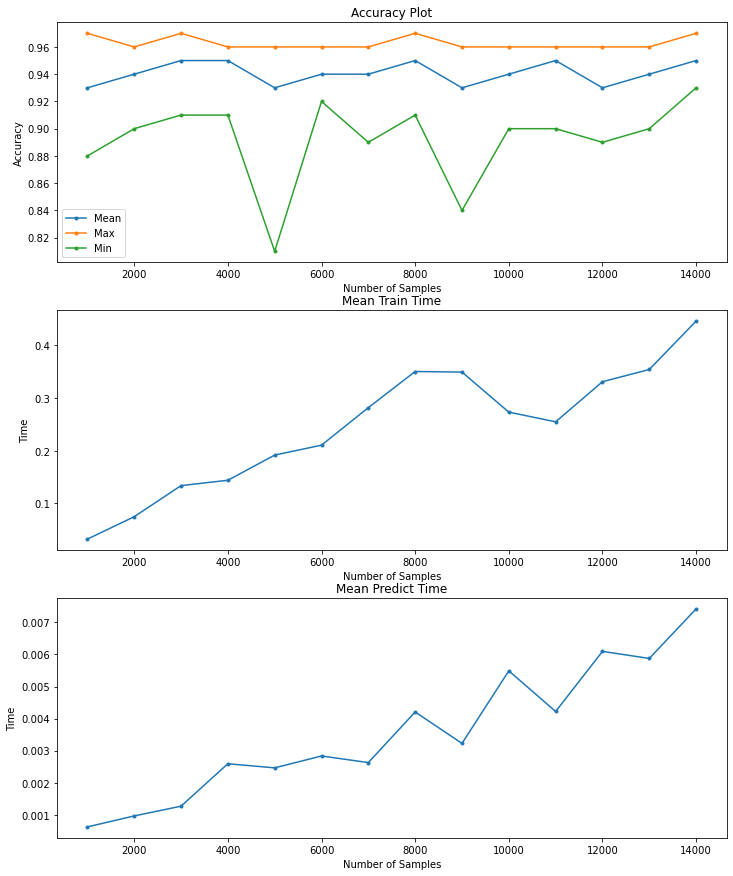

In [79]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15)) #creating a group of plots 3 one above another

axes[0].plot(per_range,per_acc, ".-", label= "Mean") #first plot with acc socres
axes[0].plot(per_range,per_max_acc, ".-",label = "Max")
axes[0].plot(per_range,per_min_acc, ".-",label = "Min")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend()

axes[1].plot(per_range,per_train, ".-") #Plotting mean train time
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')

axes[2].plot(per_range,per_predict, ".-") #plotting mean predict time
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')


## Task 3: Support Vector Machine

This model for SVM function  was created in very similar way to the perceptron model.  It was created using the SVC model from sklearn and used a loop to get the mean, max and min accuracy score for each fold (10 folds) as well as the train and predict time for each fold.  The main difference is this model function allows for the input of different parameters (kernal and gamma to compare the results based on these different input parameters.

In [13]:
from sklearn.svm import SVC

In [28]:
def model_SVC(X,y, k,g): #creating model function. k and g allows for kernal and gamma input
    clf = SVC(kernel=k, gamma=g) #SVM model
    kf = KFold(n_splits=10, random_state=42) #kfold for 10 splits
    i = 0
    train_time = list(range(0,10))
    predict_time = list(range(0,10)) # lists with range of 10 for each fold. One for acc score, train time and predict time for model and fold comparsion 
    acc_score = list(range(0,10))
    for train_indices, test_indices in kf.split(X,y): #loop for each fold
        start1 = time.time() #start time
        clf.fit(X[train_indices], y[train_indices]) # fitting each fold
        end1 = time.time() #end time
        
        start2 = time.time()
        y_pred = clf.predict(X[test_indices]) #prediction each fold
        end2 = time.time()

        print ("","FOLD", i+1, "\n", 
               "Confustion matrix:","\n", 
               confusion_matrix(y[test_indices], y_pred),"\n",
              "Accuaracy Score:", accuracy_score(y[test_indices], y_pred), 
               "\n" ) #printing confusion matrix and acc score for each fold.
        
        accu =  accuracy_score(y[test_indices], y_pred)
        acc_score[i] = accu #storing each acc score
        
        time1 =  end1 - start1 
        time2 = end2 - start2
        train_time[i] = time1 #getting train time for each loop
        predict_time[i] = time2  #getting predict time for each loop
        i=i+1
        
    print("\n")
    print ("Mean Accuracy score:", round(mean(acc_score),3)) #printing min max mean acc scores for each loop
    print ("Max Accuracy score:", round(max(acc_score),3))
    print ("Min Accuracy score:", round(min(acc_score),3), "\n")
    
    print ("Mean train time:", round(mean(train_time),8)) #pring min max mean train time
    print ("Max train time:", round(max(train_time),8))
    print ("Min train time:", round(min(train_time),8), "\n")
    
    print ("Mean predict time:", round(mean(predict_time),8))#printing min max mean predict time
    print ("Max predict time:", round(max(predict_time),8))
    print ("Min predict time:", round(min(predict_time),8), "\n")
    
    mean_acc_score = mean(acc_score) #storing mean max min acc scores and mean train and predict times
    max_acc_score = max(acc_score)
    min_acc_score = min(acc_score)
    mean_train_time = mean(train_time)
    mean_test_time = mean(predict_time)
    
    return mean_acc_score,  max_acc_score, min_acc_score, mean_train_time, mean_test_time #fuction returns these values

##### Testing and getting an overview of this model using 100 samples and linear and scale as imput parameters

In [23]:
model_SVC(X,y,"linear", "scale" )

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[51  0]
 [ 3 46]] 
 Accuaracy Score: 0.97 

 FOLD 2 
 Confustion matrix: 
 [[47  7]
 [ 0 46]] 
 Accuaracy Score: 0.93 

 FOLD 3 
 Confustion matrix: 
 [[49  1]
 [ 5 45]] 
 Accuaracy Score: 0.94 

 FOLD 4 
 Confustion matrix: 
 [[51  2]
 [ 1 46]] 
 Accuaracy Score: 0.97 

 FOLD 5 
 Confustion matrix: 
 [[50  4]
 [ 1 45]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[46  3]
 [ 5 46]] 
 Accuaracy Score: 0.92 

 FOLD 7 
 Confustion matrix: 
 [[51  4]
 [ 4 41]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[46  4]
 [ 5 45]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[43  4]
 [ 5 48]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.938
Max Accuracy score: 0.97
Min Accuracy score: 0.91 

Mean train time: 0.17698677
Max train time: 0.18715501
Min train time: 0.16612005 

Mean predict time: 0.0140744
Max predict time: 0.0144372
Min predict time:

(0.938, 0.97, 0.91, 0.17698676586151124, 0.014074397087097169)

### Linear Scale:

As before we can use a loop to test our model using different sample sizes.  I have set the max at 5000 samples for this model as it takes much longer the Perceptron model.  Accuracy maxes out between 2000 - 3000 samples.  Model scores very highly.  There is a large increase in the lenght of time training model takes as you approch 5000 samples

In [35]:
lin_scale_acc = [] # creating empty lists to store the results. 
lin_scale_max_acc = []
lin_scale_min_acc = []
lin_scale_train = []
lin_scale_predict = []
lin_scale_range = []

for r in range(1000, 5001, 1000): #loop for each sample size up 5000 in stepts of 1000
    X,y=get_sample(r)
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_SVC(X,y, "linear","scale") #applying each loop to model choosing linear and scale parampers
    
    lin_scale_range.append(r)
    lin_scale_acc.append(round(ma,2))
    lin_scale_max_acc.append(round(mxa,2)) # appending results to empty lists.
    lin_scale_min_acc.append(round(mna,2))
    lin_scale_train.append(round(mt,8))
    lin_scale_predict.append(round(mp,8))

SAMPLE SIZE: 1000


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[51  0]
 [ 3 46]] 
 Accuaracy Score: 0.97 

 FOLD 2 
 Confustion matrix: 
 [[47  7]
 [ 0 46]] 
 Accuaracy Score: 0.93 

 FOLD 3 
 Confustion matrix: 
 [[49  1]
 [ 5 45]] 
 Accuaracy Score: 0.94 

 FOLD 4 
 Confustion matrix: 
 [[51  2]
 [ 1 46]] 
 Accuaracy Score: 0.97 

 FOLD 5 
 Confustion matrix: 
 [[50  4]
 [ 1 45]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[46  3]
 [ 5 46]] 
 Accuaracy Score: 0.92 

 FOLD 7 
 Confustion matrix: 
 [[51  4]
 [ 4 41]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[46  4]
 [ 5 45]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[43  4]
 [ 5 48]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.938
Max Accuracy score: 0.97
Min Accuracy score: 0.91 

Mean train time: 0.18999991
Max train time: 0.20191002
Min train time: 0.17933321 

Mean predict time: 0.0150557
Max predict time: 0.02220798
Min predict time

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[99  6]
 [ 3 92]] 
 Accuaracy Score: 0.955 

 FOLD 2 
 Confustion matrix: 
 [[100   3]
 [  6  91]] 
 Accuaracy Score: 0.955 

 FOLD 3 
 Confustion matrix: 
 [[97  6]
 [ 7 90]] 
 Accuaracy Score: 0.935 

 FOLD 4 
 Confustion matrix: 
 [[94  7]
 [ 5 94]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[ 91   6]
 [  3 100]] 
 Accuaracy Score: 0.955 

 FOLD 6 
 Confustion matrix: 
 [[101   8]
 [  5  86]] 
 Accuaracy Score: 0.935 

 FOLD 7 
 Confustion matrix: 
 [[89  4]
 [ 8 99]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[93  3]
 [ 6 98]] 
 Accuaracy Score: 0.955 

 FOLD 9 
 Confustion matrix: 
 [[106   3]
 [  5  86]] 
 Accuaracy Score: 0.96 

 FOLD 10 
 Confustion matrix: 
 [[ 80   8]
 [  2 110]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.948
Max Accuracy score: 0.96
Min Accuracy score: 0.935 

Mean train time: 0.6789871
Max train time: 0.73636675
Min train time: 0.63108778 

Mean predict time: 0.04406216
Max predict time: 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[150   5]
 [  5 140]] 
 Accuaracy Score: 0.9666666666666667 

 FOLD 2 
 Confustion matrix: 
 [[149   7]
 [  7 137]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 3 
 Confustion matrix: 
 [[141  10]
 [  8 141]] 
 Accuaracy Score: 0.94 

 FOLD 4 
 Confustion matrix: 
 [[146  10]
 [  6 138]] 
 Accuaracy Score: 0.9466666666666667 

 FOLD 5 
 Confustion matrix: 
 [[137   6]
 [  9 148]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[149   6]
 [  5 140]] 
 Accuaracy Score: 0.9633333333333334 

 FOLD 7 
 Confustion matrix: 
 [[124  14]
 [  4 158]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[146   8]
 [ 10 136]] 
 Accuaracy Score: 0.94 

 FOLD 9 
 Confustion matrix: 
 [[151  10]
 [ 10 129]] 
 Accuaracy Score: 0.9333333333333333 

 FOLD 10 
 Confustion matrix: 
 [[153   8]
 [  6 133]] 
 Accuaracy Score: 0.9533333333333334 



Mean Accuracy score: 0.949
Max Accuracy score: 0.967
Min Accuracy score: 0.933 

Mean train time: 1.35040357
Max 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[198  10]
 [  9 183]] 
 Accuaracy Score: 0.9525 

 FOLD 2 
 Confustion matrix: 
 [[190  14]
 [ 10 186]] 
 Accuaracy Score: 0.94 

 FOLD 3 
 Confustion matrix: 
 [[190  16]
 [  5 189]] 
 Accuaracy Score: 0.9475 

 FOLD 4 
 Confustion matrix: 
 [[179  10]
 [ 12 199]] 
 Accuaracy Score: 0.945 

 FOLD 5 
 Confustion matrix: 
 [[182  15]
 [  5 198]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[193  11]
 [ 15 181]] 
 Accuaracy Score: 0.935 

 FOLD 7 
 Confustion matrix: 
 [[197  15]
 [ 10 178]] 
 Accuaracy Score: 0.9375 

 FOLD 8 
 Confustion matrix: 
 [[191  13]
 [ 12 184]] 
 Accuaracy Score: 0.9375 

 FOLD 9 
 Confustion matrix: 
 [[198  14]
 [ 12 176]] 
 Accuaracy Score: 0.935 

 FOLD 10 
 Confustion matrix: 
 [[184  13]
 [ 13 190]] 
 Accuaracy Score: 0.935 



Mean Accuracy score: 0.942
Max Accuracy score: 0.952
Min Accuracy score: 0.935 

Mean train time: 2.27448714
Max train time: 2.414819
Min train time: 2.14084196 

Mean predict time: 0.1

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[250  12]
 [ 16 222]] 
 Accuaracy Score: 0.944 

 FOLD 2 
 Confustion matrix: 
 [[232  15]
 [ 12 241]] 
 Accuaracy Score: 0.946 

 FOLD 3 
 Confustion matrix: 
 [[238  14]
 [ 10 238]] 
 Accuaracy Score: 0.952 

 FOLD 4 
 Confustion matrix: 
 [[226  17]
 [ 13 244]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[245  17]
 [ 14 224]] 
 Accuaracy Score: 0.938 

 FOLD 6 
 Confustion matrix: 
 [[247  17]
 [ 17 219]] 
 Accuaracy Score: 0.932 

 FOLD 7 
 Confustion matrix: 
 [[239  17]
 [ 17 227]] 
 Accuaracy Score: 0.932 

 FOLD 8 
 Confustion matrix: 
 [[234  13]
 [ 14 239]] 
 Accuaracy Score: 0.946 

 FOLD 9 
 Confustion matrix: 
 [[243  20]
 [ 11 226]] 
 Accuaracy Score: 0.938 

 FOLD 10 
 Confustion matrix: 
 [[234  10]
 [ 16 240]] 
 Accuaracy Score: 0.948 



Mean Accuracy score: 0.942
Max Accuracy score: 0.952
Min Accuracy score: 0.932 

Mean train time: 4.08572035
Max train time: 4.53685904
Min train time: 3.89453602 

Mean predict time: 0.20

### Plotting results:

Text(0, 0.5, 'Time')

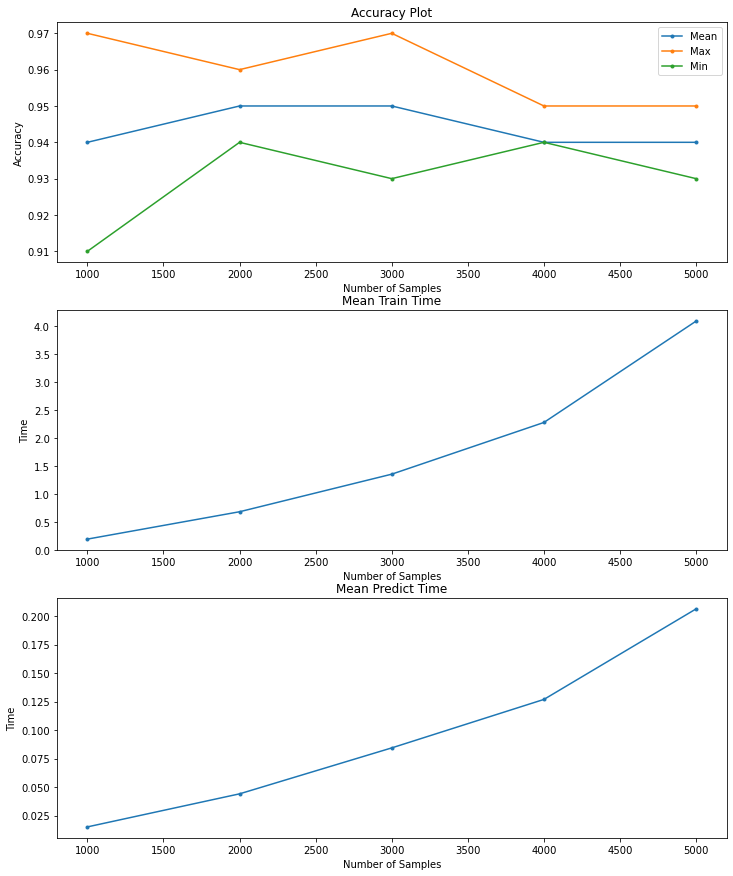

In [78]:

fig, axes = plt.subplots(3, 1, figsize=(12, 15)) #group of 3 plots

axes[0].plot(lin_scale_range,lin_scale_acc, ".-", label= "Mean")
axes[0].plot(lin_scale_range,lin_scale_max_acc, ".-",label = "Max") #first 
axes[0].plot(lin_scale_range,lin_scale_min_acc, ".-",label = "Min")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend()

axes[1].plot(lin_scale_range,lin_scale_train, ".-") #second
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')

axes[2].plot(lin_scale_range,lin_scale_predict, ".-") #third
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')

Accuracy maxes out between 2000 - 3000 samples.  Model scores very highly.  There is a large increase in the lenght of time training model takes as you approch 5000 samples

### Linear Auto:

Based on the results the model scores very highly with an average accuracy score of 0.942.  Looking at the plots again averge accuracy maxes out between 2000 - 3000 samples and Train and Predict time take much longer as you approch 5000 samples.  For this model it would be benefical to use around 3000 samples 

In [36]:
# sample size loop
lin_auto_acc = []
lin_auto_max_acc = []
lin_auto_min_acc = []
lin_auto_train = []
lin_auto_predict = []
lin_auto_range = []

for r in range(1000, 5001, 1000):
    X,y=get_sample(r)
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_SVC(X,y, "linear","auto")
    
    lin_auto_range.append(r)
    lin_auto_acc.append(round(ma,2))
    lin_auto_max_acc.append(round(mxa,2))
    lin_auto_min_acc.append(round(mna,2))
    lin_auto_train.append(round(mt,8))
    lin_auto_predict.append(round(mp,8))

SAMPLE SIZE: 1000


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[51  0]
 [ 3 46]] 
 Accuaracy Score: 0.97 

 FOLD 2 
 Confustion matrix: 
 [[47  7]
 [ 0 46]] 
 Accuaracy Score: 0.93 

 FOLD 3 
 Confustion matrix: 
 [[49  1]
 [ 5 45]] 
 Accuaracy Score: 0.94 

 FOLD 4 
 Confustion matrix: 
 [[51  2]
 [ 1 46]] 
 Accuaracy Score: 0.97 

 FOLD 5 
 Confustion matrix: 
 [[50  4]
 [ 1 45]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[46  3]
 [ 5 46]] 
 Accuaracy Score: 0.92 

 FOLD 7 
 Confustion matrix: 
 [[51  4]
 [ 4 41]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[46  4]
 [ 5 45]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[43  4]
 [ 5 48]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.938
Max Accuracy score: 0.97
Min Accuracy score: 0.91 

Mean train time: 0.18454189
Max train time: 0.19831395
Min train time: 0.17049479 

Mean predict time: 0.01470366
Max predict time: 0.01824999
Min predict tim

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[99  6]
 [ 3 92]] 
 Accuaracy Score: 0.955 

 FOLD 2 
 Confustion matrix: 
 [[100   3]
 [  6  91]] 
 Accuaracy Score: 0.955 

 FOLD 3 
 Confustion matrix: 
 [[97  6]
 [ 7 90]] 
 Accuaracy Score: 0.935 

 FOLD 4 
 Confustion matrix: 
 [[94  7]
 [ 5 94]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[ 91   6]
 [  3 100]] 
 Accuaracy Score: 0.955 

 FOLD 6 
 Confustion matrix: 
 [[101   8]
 [  5  86]] 
 Accuaracy Score: 0.935 

 FOLD 7 
 Confustion matrix: 
 [[89  4]
 [ 8 99]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[93  3]
 [ 6 98]] 
 Accuaracy Score: 0.955 

 FOLD 9 
 Confustion matrix: 
 [[106   3]
 [  5  86]] 
 Accuaracy Score: 0.96 

 FOLD 10 
 Confustion matrix: 
 [[ 80   8]
 [  2 110]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.948
Max Accuracy score: 0.96
Min Accuracy score: 0.935 

Mean train time: 0.614821
Max train time: 0.67777801
Min train time: 0.56253219 

Mean predict time: 0.04325473
Max predict time: 0

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[150   5]
 [  5 140]] 
 Accuaracy Score: 0.9666666666666667 

 FOLD 2 
 Confustion matrix: 
 [[149   7]
 [  7 137]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 3 
 Confustion matrix: 
 [[141  10]
 [  8 141]] 
 Accuaracy Score: 0.94 

 FOLD 4 
 Confustion matrix: 
 [[146  10]
 [  6 138]] 
 Accuaracy Score: 0.9466666666666667 

 FOLD 5 
 Confustion matrix: 
 [[137   6]
 [  9 148]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[149   6]
 [  5 140]] 
 Accuaracy Score: 0.9633333333333334 

 FOLD 7 
 Confustion matrix: 
 [[124  14]
 [  4 158]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[146   8]
 [ 10 136]] 
 Accuaracy Score: 0.94 

 FOLD 9 
 Confustion matrix: 
 [[151  10]
 [ 10 129]] 
 Accuaracy Score: 0.9333333333333333 

 FOLD 10 
 Confustion matrix: 
 [[153   8]
 [  6 133]] 
 Accuaracy Score: 0.9533333333333334 



Mean Accuracy score: 0.949
Max Accuracy score: 0.967
Min Accuracy score: 0.933 

Mean train time: 1.30421994
Max 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[198  10]
 [  9 183]] 
 Accuaracy Score: 0.9525 

 FOLD 2 
 Confustion matrix: 
 [[190  14]
 [ 10 186]] 
 Accuaracy Score: 0.94 

 FOLD 3 
 Confustion matrix: 
 [[190  16]
 [  5 189]] 
 Accuaracy Score: 0.9475 

 FOLD 4 
 Confustion matrix: 
 [[179  10]
 [ 12 199]] 
 Accuaracy Score: 0.945 

 FOLD 5 
 Confustion matrix: 
 [[182  15]
 [  5 198]] 
 Accuaracy Score: 0.95 

 FOLD 6 
 Confustion matrix: 
 [[193  11]
 [ 15 181]] 
 Accuaracy Score: 0.935 

 FOLD 7 
 Confustion matrix: 
 [[197  15]
 [ 10 178]] 
 Accuaracy Score: 0.9375 

 FOLD 8 
 Confustion matrix: 
 [[191  13]
 [ 12 184]] 
 Accuaracy Score: 0.9375 

 FOLD 9 
 Confustion matrix: 
 [[198  14]
 [ 12 176]] 
 Accuaracy Score: 0.935 

 FOLD 10 
 Confustion matrix: 
 [[184  13]
 [ 13 190]] 
 Accuaracy Score: 0.935 



Mean Accuracy score: 0.942
Max Accuracy score: 0.952
Min Accuracy score: 0.935 

Mean train time: 2.44092162
Max train time: 2.63168883
Min train time: 2.27139091 

Mean predict time: 0

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[250  12]
 [ 16 222]] 
 Accuaracy Score: 0.944 

 FOLD 2 
 Confustion matrix: 
 [[232  15]
 [ 12 241]] 
 Accuaracy Score: 0.946 

 FOLD 3 
 Confustion matrix: 
 [[238  14]
 [ 10 238]] 
 Accuaracy Score: 0.952 

 FOLD 4 
 Confustion matrix: 
 [[226  17]
 [ 13 244]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[245  17]
 [ 14 224]] 
 Accuaracy Score: 0.938 

 FOLD 6 
 Confustion matrix: 
 [[247  17]
 [ 17 219]] 
 Accuaracy Score: 0.932 

 FOLD 7 
 Confustion matrix: 
 [[239  17]
 [ 17 227]] 
 Accuaracy Score: 0.932 

 FOLD 8 
 Confustion matrix: 
 [[234  13]
 [ 14 239]] 
 Accuaracy Score: 0.946 

 FOLD 9 
 Confustion matrix: 
 [[243  20]
 [ 11 226]] 
 Accuaracy Score: 0.938 

 FOLD 10 
 Confustion matrix: 
 [[234  10]
 [ 16 240]] 
 Accuaracy Score: 0.948 



Mean Accuracy score: 0.942
Max Accuracy score: 0.952
Min Accuracy score: 0.932 

Mean train time: 4.06102941
Max train time: 4.30627203
Min train time: 3.84764433 

Mean predict time: 0.20

Text(0, 0.5, 'Time')

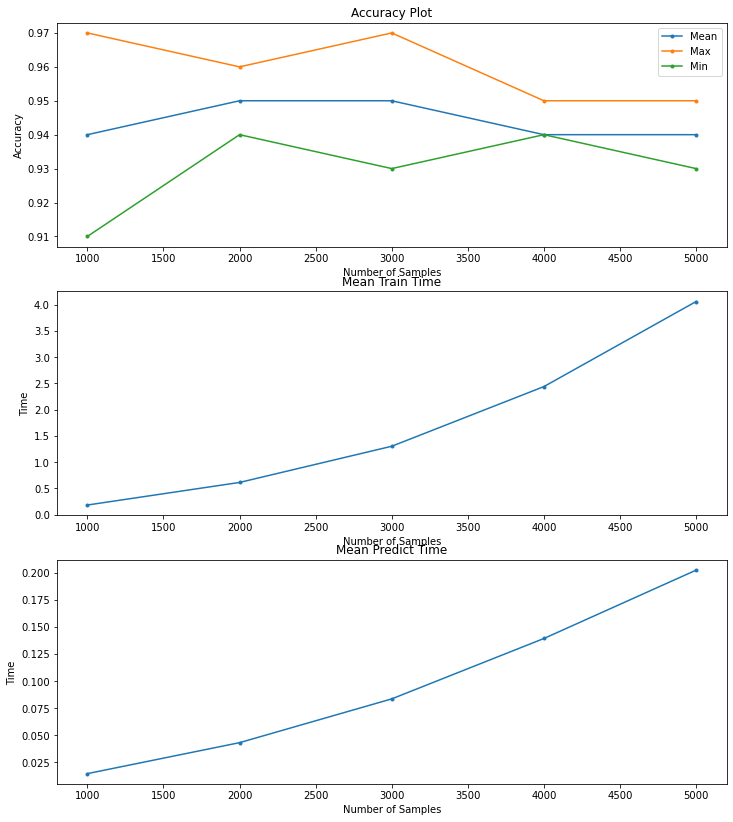

In [77]:
#plots as before
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

axes[0].plot(lin_auto_range,lin_auto_acc, ".-", label= "Mean")
axes[0].plot(lin_auto_range,lin_auto_max_acc, ".-",label = "Max")
axes[0].plot(lin_auto_range,lin_auto_min_acc, ".-",label = "Min")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend()

axes[1].plot(lin_auto_range,lin_auto_train, ".-")
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')

axes[2].plot(lin_auto_range,lin_auto_predict, ".-")
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')

### RBF Scale:

This model was created using RBF and scale as parameters.  This model also scored very highly with  mean scores above 0.93 for each sample.  Looking at the plots the mean socre maxes out at 3000 samples.  There is also a reduction in the difference of the average min score and max score at 3000 samples.  Beyond 3000 samples the train time and predict time increase a lot without much benefit to the accuracy scores.  Around 3000 samples seems to be the best fit for this model

In [37]:
# sample size loop
rbf_scale_acc = []
rbf_scale_max_acc = []
rbf_scale_min_acc = []
rbf_scale_train = []
rbf_scale_predict = []
rbf_scale_range = []

for r in range(1000, 5001, 1000):
    X,y=get_sample(r)
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_SVC(X,y, "rbf","scale")
    
    rbf_scale_range.append(r)
    rbf_scale_acc.append(round(ma,2))
    rbf_scale_max_acc.append(round(mxa,2))
    rbf_scale_min_acc.append(round(mna,2))
    rbf_scale_train.append(round(mt,8))
    rbf_scale_predict.append(round(mp,8))

SAMPLE SIZE: 1000


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[51  0]
 [ 3 46]] 
 Accuaracy Score: 0.97 

 FOLD 2 
 Confustion matrix: 
 [[47  7]
 [ 1 45]] 
 Accuaracy Score: 0.92 

 FOLD 3 
 Confustion matrix: 
 [[49  1]
 [ 1 49]] 
 Accuaracy Score: 0.98 

 FOLD 4 
 Confustion matrix: 
 [[50  3]
 [ 2 45]] 
 Accuaracy Score: 0.95 

 FOLD 5 
 Confustion matrix: 
 [[52  2]
 [ 1 45]] 
 Accuaracy Score: 0.97 

 FOLD 6 
 Confustion matrix: 
 [[45  4]
 [ 1 50]] 
 Accuaracy Score: 0.95 

 FOLD 7 
 Confustion matrix: 
 [[47  8]
 [ 2 43]] 
 Accuaracy Score: 0.9 

 FOLD 8 
 Confustion matrix: 
 [[46  0]
 [ 1 53]] 
 Accuaracy Score: 0.99 

 FOLD 9 
 Confustion matrix: 
 [[47  3]
 [ 4 46]] 
 Accuaracy Score: 0.93 

 FOLD 10 
 Confustion matrix: 
 [[44  3]
 [ 7 46]] 
 Accuaracy Score: 0.9 



Mean Accuracy score: 0.946
Max Accuracy score: 0.99
Min Accuracy score: 0.9 

Mean train time: 0.23750892
Max train time: 0.26414895
Min train time: 0.21503925 

Mean predict time: 0.02348735
Max predict time: 0.02493978
Min predict time: 

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[99  6]
 [ 4 91]] 
 Accuaracy Score: 0.95 

 FOLD 2 
 Confustion matrix: 
 [[101   2]
 [  2  95]] 
 Accuaracy Score: 0.98 

 FOLD 3 
 Confustion matrix: 
 [[96  7]
 [ 1 96]] 
 Accuaracy Score: 0.96 

 FOLD 4 
 Confustion matrix: 
 [[93  8]
 [ 4 95]] 
 Accuaracy Score: 0.94 

 FOLD 5 
 Confustion matrix: 
 [[91  6]
 [10 93]] 
 Accuaracy Score: 0.92 

 FOLD 6 
 Confustion matrix: 
 [[102   7]
 [  1  90]] 
 Accuaracy Score: 0.96 

 FOLD 7 
 Confustion matrix: 
 [[ 91   2]
 [  6 101]] 
 Accuaracy Score: 0.96 

 FOLD 8 
 Confustion matrix: 
 [[92  4]
 [ 5 99]] 
 Accuaracy Score: 0.955 

 FOLD 9 
 Confustion matrix: 
 [[101   8]
 [  4  87]] 
 Accuaracy Score: 0.94 

 FOLD 10 
 Confustion matrix: 
 [[ 81   7]
 [  2 110]] 
 Accuaracy Score: 0.955 



Mean Accuracy score: 0.952
Max Accuracy score: 0.98
Min Accuracy score: 0.92 

Mean train time: 0.84064283
Max train time: 0.88355303
Min train time: 0.80271411 

Mean predict time: 0.08003051
Max predict time: 0.08

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[151   4]
 [  5 140]] 
 Accuaracy Score: 0.97 

 FOLD 2 
 Confustion matrix: 
 [[153   3]
 [  5 139]] 
 Accuaracy Score: 0.9733333333333334 

 FOLD 3 
 Confustion matrix: 
 [[143   8]
 [  8 141]] 
 Accuaracy Score: 0.9466666666666667 

 FOLD 4 
 Confustion matrix: 
 [[147   9]
 [  6 138]] 
 Accuaracy Score: 0.95 

 FOLD 5 
 Confustion matrix: 
 [[141   2]
 [  8 149]] 
 Accuaracy Score: 0.9666666666666667 

 FOLD 6 
 Confustion matrix: 
 [[149   6]
 [  8 137]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 7 
 Confustion matrix: 
 [[129   9]
 [  5 157]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 8 
 Confustion matrix: 
 [[145   9]
 [  6 140]] 
 Accuaracy Score: 0.95 

 FOLD 9 
 Confustion matrix: 
 [[155   6]
 [  7 132]] 
 Accuaracy Score: 0.9566666666666667 

 FOLD 10 
 Confustion matrix: 
 [[155   6]
 [  5 134]] 
 Accuaracy Score: 0.9633333333333334 



Mean Accuracy score: 0.958
Max Accuracy score: 0.973
Min Accuracy score: 0.947 

Mean train time: 1

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[203   5]
 [  6 186]] 
 Accuaracy Score: 0.9725 

 FOLD 2 
 Confustion matrix: 
 [[197   7]
 [  6 190]] 
 Accuaracy Score: 0.9675 

 FOLD 3 
 Confustion matrix: 
 [[198   8]
 [  9 185]] 
 Accuaracy Score: 0.9575 

 FOLD 4 
 Confustion matrix: 
 [[187   2]
 [ 14 197]] 
 Accuaracy Score: 0.96 

 FOLD 5 
 Confustion matrix: 
 [[185  12]
 [  7 196]] 
 Accuaracy Score: 0.9525 

 FOLD 6 
 Confustion matrix: 
 [[195   9]
 [  8 188]] 
 Accuaracy Score: 0.9575 

 FOLD 7 
 Confustion matrix: 
 [[207   5]
 [ 10 178]] 
 Accuaracy Score: 0.9625 

 FOLD 8 
 Confustion matrix: 
 [[198   6]
 [  8 188]] 
 Accuaracy Score: 0.965 

 FOLD 9 
 Confustion matrix: 
 [[206   6]
 [  5 183]] 
 Accuaracy Score: 0.9725 

 FOLD 10 
 Confustion matrix: 
 [[187  10]
 [  6 197]] 
 Accuaracy Score: 0.96 



Mean Accuracy score: 0.963
Max Accuracy score: 0.972
Min Accuracy score: 0.952 

Mean train time: 2.79978936
Max train time: 2.9147141
Min train time: 2.62635803 

Mean predict time:

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[256   6]
 [  6 232]] 
 Accuaracy Score: 0.976 

 FOLD 2 
 Confustion matrix: 
 [[239   8]
 [ 15 238]] 
 Accuaracy Score: 0.954 

 FOLD 3 
 Confustion matrix: 
 [[246   6]
 [ 10 238]] 
 Accuaracy Score: 0.968 

 FOLD 4 
 Confustion matrix: 
 [[232  11]
 [ 13 244]] 
 Accuaracy Score: 0.952 

 FOLD 5 
 Confustion matrix: 
 [[253   9]
 [ 10 228]] 
 Accuaracy Score: 0.962 

 FOLD 6 
 Confustion matrix: 
 [[257   7]
 [ 11 225]] 
 Accuaracy Score: 0.964 

 FOLD 7 
 Confustion matrix: 
 [[249   7]
 [ 10 234]] 
 Accuaracy Score: 0.966 

 FOLD 8 
 Confustion matrix: 
 [[238   9]
 [  8 245]] 
 Accuaracy Score: 0.966 

 FOLD 9 
 Confustion matrix: 
 [[248  15]
 [ 10 227]] 
 Accuaracy Score: 0.95 

 FOLD 10 
 Confustion matrix: 
 [[239   5]
 [ 11 245]] 
 Accuaracy Score: 0.968 



Mean Accuracy score: 0.963
Max Accuracy score: 0.976
Min Accuracy score: 0.95 

Mean train time: 4.17094038
Max train time: 4.27190876
Min train time: 4.11835289 

Mean predict time: 0.410

Text(0, 0.5, 'Time')

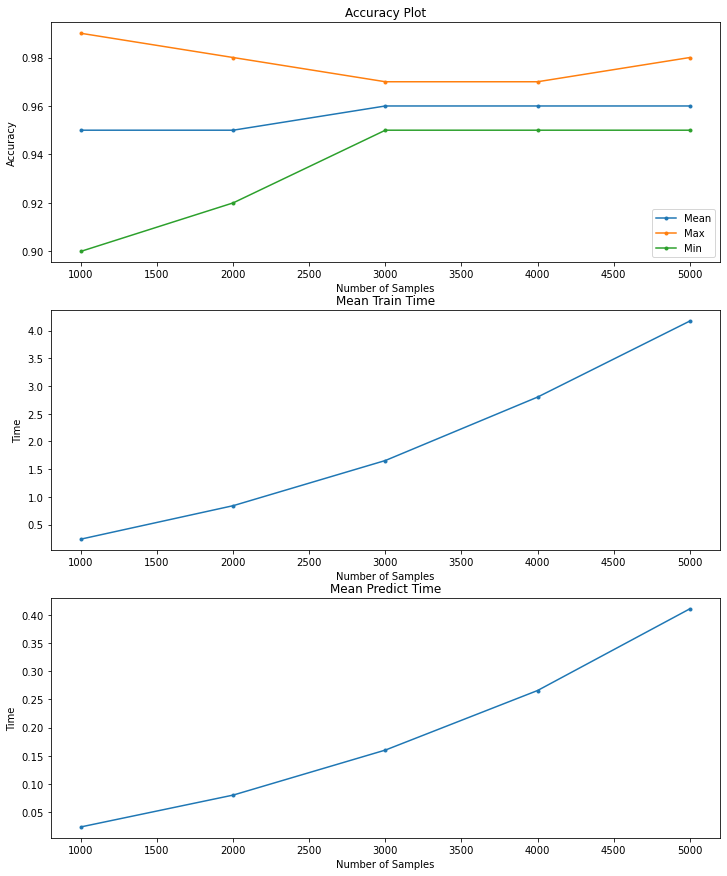

In [75]:
#plots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

axes[0].plot(rbf_scale_range,rbf_scale_acc, ".-", label= "Mean")
axes[0].plot(rbf_scale_range,rbf_scale_max_acc, ".-",label = "Max")
axes[0].plot(rbf_scale_range,rbf_scale_min_acc, ".-",label = "Min")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend()

axes[1].plot(rbf_scale_range,rbf_scale_train, ".-")
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')

axes[2].plot(rbf_scale_range,rbf_scale_predict, ".-")
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')

### RBF Auto

This was created using RBF and Auto as input parameters.  This was by far the worst scoring model.  With the max mean score below 0.6 and average scores between 5.8 and 4.2.  This scores much lower than all the other models. This is also the slowest model to perform.  It takes over 20s to train the model at 5000 samples.  Based on the results and the time it takes I would not reccommed this model over any of the other models. 

In [38]:
#sample size loop
rbf_auto_acc = []
rbf_auto_max_acc = []
rbf_auto_min_acc = []
rbf_auto_train = []
rbf_auto_predict = []
rbf_auto_range = []

for r in range(1000, 5001, 1000):
    X,y=get_sample(r)
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_SVC(X,y, "rbf","auto")
    
    rbf_auto_range.append(r)
    rbf_auto_acc.append(round(ma,2))
    rbf_auto_max_acc.append(round(mxa,2))
    rbf_auto_min_acc.append(round(mna,2))
    rbf_auto_train.append(round(mt,8))
    rbf_auto_predict.append(round(mp,8))

SAMPLE SIZE: 1000


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[51  0]
 [49  0]] 
 Accuaracy Score: 0.51 

 FOLD 2 
 Confustion matrix: 
 [[54  0]
 [46  0]] 
 Accuaracy Score: 0.54 

 FOLD 3 
 Confustion matrix: 
 [[50  0]
 [50  0]] 
 Accuaracy Score: 0.5 

 FOLD 4 
 Confustion matrix: 
 [[53  0]
 [47  0]] 
 Accuaracy Score: 0.53 

 FOLD 5 
 Confustion matrix: 
 [[54  0]
 [46  0]] 
 Accuaracy Score: 0.54 

 FOLD 6 
 Confustion matrix: 
 [[49  0]
 [51  0]] 
 Accuaracy Score: 0.49 

 FOLD 7 
 Confustion matrix: 
 [[55  0]
 [45  0]] 
 Accuaracy Score: 0.55 

 FOLD 8 
 Confustion matrix: 
 [[46  0]
 [54  0]] 
 Accuaracy Score: 0.46 

 FOLD 9 
 Confustion matrix: 
 [[50  0]
 [50  0]] 
 Accuaracy Score: 0.5 

 FOLD 10 
 Confustion matrix: 
 [[47  0]
 [53  0]] 
 Accuaracy Score: 0.47 



Mean Accuracy score: 0.509
Max Accuracy score: 0.55
Min Accuracy score: 0.46 

Mean train time: 0.96609695
Max train time: 1.03959894
Min train time: 0.90850306 

Mean predict time: 0.10430796
Max predict time: 0.11631584
Min predict time:

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[  0 105]
 [  0  95]] 
 Accuaracy Score: 0.475 

 FOLD 2 
 Confustion matrix: 
 [[103   0]
 [ 97   0]] 
 Accuaracy Score: 0.515 

 FOLD 3 
 Confustion matrix: 
 [[103   0]
 [ 97   0]] 
 Accuaracy Score: 0.515 

 FOLD 4 
 Confustion matrix: 
 [[101   0]
 [ 99   0]] 
 Accuaracy Score: 0.505 

 FOLD 5 
 Confustion matrix: 
 [[ 97   0]
 [103   0]] 
 Accuaracy Score: 0.485 

 FOLD 6 
 Confustion matrix: 
 [[  0 109]
 [  0  91]] 
 Accuaracy Score: 0.455 

 FOLD 7 
 Confustion matrix: 
 [[ 93   0]
 [107   0]] 
 Accuaracy Score: 0.465 

 FOLD 8 
 Confustion matrix: 
 [[ 96   0]
 [104   0]] 
 Accuaracy Score: 0.48 

 FOLD 9 
 Confustion matrix: 
 [[  0 109]
 [  0  91]] 
 Accuaracy Score: 0.455 

 FOLD 10 
 Confustion matrix: 
 [[ 88   0]
 [112   0]] 
 Accuaracy Score: 0.44 



Mean Accuracy score: 0.479
Max Accuracy score: 0.515
Min Accuracy score: 0.44 

Mean train time: 3.96506548
Max train time: 4.40088916
Min train time: 3.70072889 

Mean predict time: 0.4160

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[155   0]
 [145   0]] 
 Accuaracy Score: 0.5166666666666667 

 FOLD 2 
 Confustion matrix: 
 [[156   0]
 [144   0]] 
 Accuaracy Score: 0.52 

 FOLD 3 
 Confustion matrix: 
 [[151   0]
 [149   0]] 
 Accuaracy Score: 0.5033333333333333 

 FOLD 4 
 Confustion matrix: 
 [[156   0]
 [144   0]] 
 Accuaracy Score: 0.52 

 FOLD 5 
 Confustion matrix: 
 [[143   0]
 [157   0]] 
 Accuaracy Score: 0.4766666666666667 

 FOLD 6 
 Confustion matrix: 
 [[155   0]
 [145   0]] 
 Accuaracy Score: 0.5166666666666667 

 FOLD 7 
 Confustion matrix: 
 [[138   0]
 [162   0]] 
 Accuaracy Score: 0.46 

 FOLD 8 
 Confustion matrix: 
 [[154   0]
 [146   0]] 
 Accuaracy Score: 0.5133333333333333 

 FOLD 9 
 Confustion matrix: 
 [[161   0]
 [139   0]] 
 Accuaracy Score: 0.5366666666666666 

 FOLD 10 
 Confustion matrix: 
 [[161   0]
 [139   0]] 
 Accuaracy Score: 0.5366666666666666 



Mean Accuracy score: 0.51
Max Accuracy score: 0.537
Min Accuracy score: 0.46 

Mean train time: 8.5

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[208   0]
 [192   0]] 
 Accuaracy Score: 0.52 

 FOLD 2 
 Confustion matrix: 
 [[204   0]
 [196   0]] 
 Accuaracy Score: 0.51 

 FOLD 3 
 Confustion matrix: 
 [[206   0]
 [194   0]] 
 Accuaracy Score: 0.515 

 FOLD 4 
 Confustion matrix: 
 [[189   0]
 [211   0]] 
 Accuaracy Score: 0.4725 

 FOLD 5 
 Confustion matrix: 
 [[197   0]
 [203   0]] 
 Accuaracy Score: 0.4925 

 FOLD 6 
 Confustion matrix: 
 [[204   0]
 [196   0]] 
 Accuaracy Score: 0.51 

 FOLD 7 
 Confustion matrix: 
 [[212   0]
 [188   0]] 
 Accuaracy Score: 0.53 

 FOLD 8 
 Confustion matrix: 
 [[204   0]
 [196   0]] 
 Accuaracy Score: 0.51 

 FOLD 9 
 Confustion matrix: 
 [[212   0]
 [188   0]] 
 Accuaracy Score: 0.53 

 FOLD 10 
 Confustion matrix: 
 [[197   0]
 [203   0]] 
 Accuaracy Score: 0.4925 



Mean Accuracy score: 0.508
Max Accuracy score: 0.53
Min Accuracy score: 0.472 

Mean train time: 15.10180011
Max train time: 16.06844592
Min train time: 14.78803515 

Mean predict time: 1.60

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[262   0]
 [238   0]] 
 Accuaracy Score: 0.524 

 FOLD 2 
 Confustion matrix: 
 [[247   0]
 [253   0]] 
 Accuaracy Score: 0.494 

 FOLD 3 
 Confustion matrix: 
 [[252   0]
 [248   0]] 
 Accuaracy Score: 0.504 

 FOLD 4 
 Confustion matrix: 
 [[243   0]
 [257   0]] 
 Accuaracy Score: 0.486 

 FOLD 5 
 Confustion matrix: 
 [[262   0]
 [238   0]] 
 Accuaracy Score: 0.524 

 FOLD 6 
 Confustion matrix: 
 [[264   0]
 [236   0]] 
 Accuaracy Score: 0.528 

 FOLD 7 
 Confustion matrix: 
 [[256   0]
 [244   0]] 
 Accuaracy Score: 0.512 

 FOLD 8 
 Confustion matrix: 
 [[247   0]
 [253   0]] 
 Accuaracy Score: 0.494 

 FOLD 9 
 Confustion matrix: 
 [[263   0]
 [237   0]] 
 Accuaracy Score: 0.526 

 FOLD 10 
 Confustion matrix: 
 [[244   0]
 [256   0]] 
 Accuaracy Score: 0.488 



Mean Accuracy score: 0.508
Max Accuracy score: 0.528
Min Accuracy score: 0.486 

Mean train time: 23.76854265
Max train time: 26.22399402
Min train time: 22.89975595 

Mean predict time: 

Text(0, 0.5, 'Time')

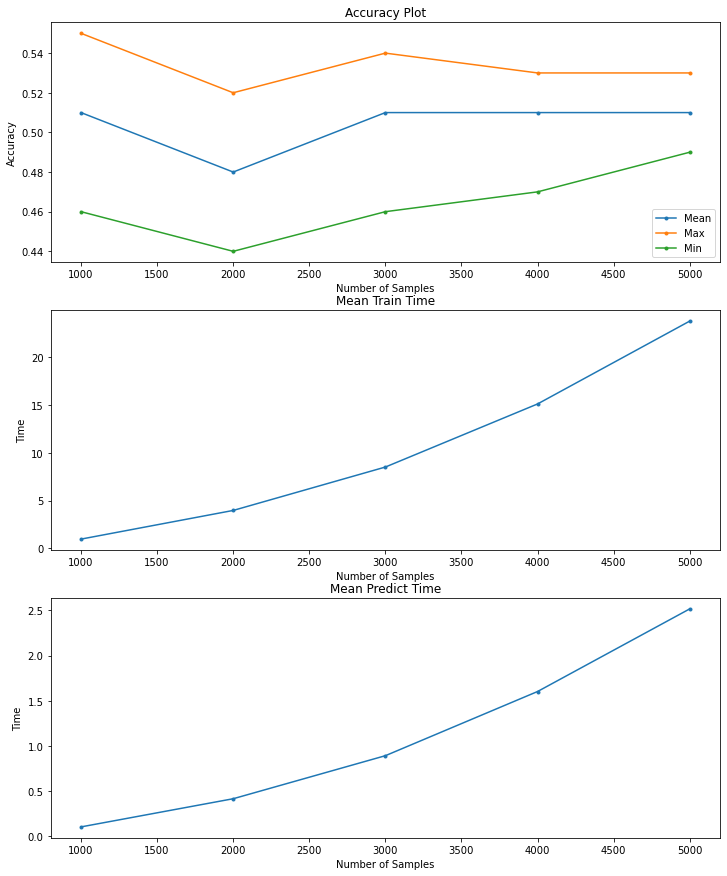

In [76]:
#plots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

axes[0].plot(rbf_auto_range,rbf_auto_acc, ".-", label= "Mean")
axes[0].plot(rbf_auto_range,rbf_auto_max_acc, ".-",label = "Max")
axes[0].plot(rbf_auto_range,rbf_auto_min_acc, ".-",label = "Min")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend()

axes[1].plot(rbf_auto_range,rbf_auto_train, ".-")
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')

axes[2].plot(rbf_auto_range,rbf_auto_predict, ".-")
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')

## Task 4: Comparison

To compare all our models we can plot the mean accuracy score of all models as well as the mean train time and mean predict time.

As we can see from the accuracy plot SVM model with parameters of RBF and Auto performed much worse.  It is useful to exclude this from the accuracy graph to get a better picture of the 3 top performing models.  Looking at this we can see the 4 models (Perceptron and SVM with parms for linear scale, linear auto and RBF scale) we can see all models perform best at around 3000 samples.  The best performing model is the RBF Scale model at around 0.96.

When looking at the train time for each model again SVM RBF Auto took the longest by a large amount.  The fastest by far was the Perceptron model which took an average of under 1 second.  The remaining models took maximum of under 5 seconds.  At 3000 samples it took under 3 seconds.  

Prediction time was similar with SVM RBF Auto by far taking the longest and the fastest with an average of under 1 second was the perceptron model.  At 3000 samples the remaining models took under 3 seconds with RBF Scale taking slightly longer. 

Taking into account the optimum data size and overall accuracy socre I would choose the SVM with inputs RBF and scale.  While it took the longest excluding the SVM RBF Auto model it did score the best and using 3000 samples the model would still not take very long to run. 

In [81]:
# getting perceptron with max 5000 samples to allow for comparison with other models
per_acc = []
per_max_acc = []
per_min_acc = []
per_train = []
per_predict = []
per_range = []

for r in range(1000, 5001, 1000):
    X,y=get_sample(r)
    print("SAMPLE SIZE:", r)
    ma,mxa,mna, mt, mp = model_perceptron(X,y)
    
    per_range.append(r)
    per_acc.append(round(ma,2))
    per_max_acc.append(round(mxa,2))
    per_min_acc.append(round(mna,2))
    per_train.append(round(mt,8))
    per_predict.append(round(mp,8))

SAMPLE SIZE: 1000
 FOLD 1 
 Confustion matrix: 
 [[50  1]
 [ 6 43]] 
 Accuaracy Score: 0.93 

 FOLD 2 
 Confustion matrix: 
 [[49  5]
 [ 0 46]] 
 Accuaracy Score: 0.95 

 FOLD 3 
 Confustion matrix: 
 [[50  0]
 [ 3 47]] 
 Accuaracy Score: 0.97 

 FOLD 4 
 Confustion matrix: 
 [[53  0]
 [12 35]] 
 Accuaracy Score: 0.88 



/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 5 
 Confustion matrix: 
 [[52  2]
 [ 1 45]] 
 Accuaracy Score: 0.97 

 FOLD 6 
 Confustion matrix: 
 [[48  1]
 [ 5 46]] 
 Accuaracy Score: 0.94 

 FOLD 7 
 Confustion matrix: 
 [[48  7]
 [ 1 44]] 
 Accuaracy Score: 0.92 

 FOLD 8 
 Confustion matrix: 
 [[45  1]
 [ 3 51]] 
 Accuaracy Score: 0.96 

 FOLD 9 
 Confustion matrix: 
 [[49  1]
 [ 8 42]] 
 Accuaracy Score: 0.91 

 FOLD 10 
 Confustion matrix: 
 [[42  5]
 [ 4 49]] 
 Accuaracy Score: 0.91 



Mean Accuracy score: 0.934
Max Accuracy score: 0.97
Min Accuracy score: 0.88 

Mean train time: 0.03414369
Max train time: 0.06398106
Min train time: 0.01697803 

Mean predict time: 0.00075054
Max predict time: 0.00266385
Min predict time: 0.00042701 

SAMPLE SIZE: 2000


/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[93 12]
 [ 1 94]] 
 Accuaracy Score: 0.935 

 FOLD 2 
 Confustion matrix: 
 [[96  7]
 [ 0 97]] 
 Accuaracy Score: 0.965 

 FOLD 3 
 Confustion matrix: 
 [[98  5]
 [ 6 91]] 
 Accuaracy Score: 0.945 

 FOLD 4 
 Confustion matrix: 
 [[85 16]
 [ 0 99]] 
 Accuaracy Score: 0.92 

 FOLD 5 
 Confustion matrix: 
 [[96  1]
 [13 90]] 
 Accuaracy Score: 0.93 

 FOLD 6 
 Confustion matrix: 
 [[91 18]
 [ 1 90]] 
 Accuaracy Score: 0.905 

 FOLD 7 
 Confustion matrix: 
 [[ 86   7]
 [  5 102]] 
 Accuaracy Score: 0.94 

 FOLD 8 
 Confustion matrix: 
 [[95  1]
 [ 6 98]] 
 Accuaracy Score: 0.965 

 FOLD 9 
 Confustion matrix: 
 [[107   2]
 [  7  84]] 
 Accuaracy Score: 0.955 

 FOLD 10 
 Confustion matrix: 
 [[ 78  10]
 [  0 112]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.941
Max Accuracy score: 0.965
Min Accuracy score: 0.905 

Mean train time: 0.07205207
Max train time: 0.09900594
Min train time: 0.04355407 

Mean predict time: 0.00086744
Max predict time: 0.0021

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 2 
 Confustion matrix: 
 [[144  12]
 [  2 142]] 
 Accuaracy Score: 0.9533333333333334 

 FOLD 3 
 Confustion matrix: 
 [[142   9]
 [  6 143]] 
 Accuaracy Score: 0.95 

 FOLD 4 
 Confustion matrix: 
 [[132  24]
 [  2 142]] 
 Accuaracy Score: 0.9133333333333333 

 FOLD 5 
 Confustion matrix: 
 [[137   6]
 [  7 150]] 
 Accuaracy Score: 0.9566666666666667 

 FOLD 6 
 Confustion matrix: 
 [[140  15]
 [  2 143]] 
 Accuaracy Score: 0.9433333333333334 

 FOLD 7 
 Confustion matrix: 
 [[119  19]
 [  1 161]] 
 Accuaracy Score: 0.9333333333333333 

 FOLD 8 
 Confustion matrix: 
 [[152   2]
 [  9 137]] 
 Accuaracy Score: 0.9633333333333334 

 FOLD 9 
 Confustion matrix: 
 [[141  20]
 [  2 137]] 
 Accuaracy Score: 0.9266666666666666 

 FOLD 10 
 Confustion matrix: 
 [[149  12]
 [  3 136]] 
 Accuaracy Score: 0.95 



Mean Accuracy score: 0.946
Max Accuracy score: 0.97
Min Accuracy score: 0.913 

Mean train time: 0.1178093
Max train time: 0.15761924
Min train time: 0.08217335 

Mean predict tim

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[200   8]
 [  6 186]] 
 Accuaracy Score: 0.965 

 FOLD 2 
 Confustion matrix: 
 [[184  20]
 [  5 191]] 
 Accuaracy Score: 0.9375 

 FOLD 3 
 Confustion matrix: 
 [[199   7]
 [ 13 181]] 
 Accuaracy Score: 0.95 

 FOLD 4 
 Confustion matrix: 
 [[187   2]
 [ 25 186]] 
 Accuaracy Score: 0.9325 

 FOLD 5 
 Confustion matrix: 
 [[182  15]
 [  1 202]] 
 Accuaracy Score: 0.96 

 FOLD 6 
 Confustion matrix: 
 [[195   9]
 [ 15 181]] 
 Accuaracy Score: 0.94 

 FOLD 7 
 Confustion matrix: 
 [[201  11]
 [ 12 176]] 
 Accuaracy Score: 0.9425 

 FOLD 8 
 Confustion matrix: 
 [[167  37]
 [  0 196]] 
 Accuaracy Score: 0.9075 

 FOLD 9 
 Confustion matrix: 
 [[205   7]
 [  9 179]] 
 Accuaracy Score: 0.96 

 FOLD 10 
 Confustion matrix: 
 [[188   9]
 [  6 197]] 
 Accuaracy Score: 0.9625 



Mean Accuracy score: 0.946
Max Accuracy score: 0.965
Min Accuracy score: 0.908 

Mean train time: 0.1255408
Max train time: 0.26768517
Min train time: 0.07975292 

Mean predict time: 0.0

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 FOLD 1 
 Confustion matrix: 
 [[224  38]
 [  0 238]] 
 Accuaracy Score: 0.924 

 FOLD 2 
 Confustion matrix: 
 [[244   3]
 [ 32 221]] 
 Accuaracy Score: 0.93 

 FOLD 3 
 Confustion matrix: 
 [[234  18]
 [  9 239]] 
 Accuaracy Score: 0.946 

 FOLD 4 
 Confustion matrix: 
 [[233  10]
 [ 16 241]] 
 Accuaracy Score: 0.948 

 FOLD 5 
 Confustion matrix: 
 [[236  26]
 [  5 233]] 
 Accuaracy Score: 0.938 

 FOLD 6 
 Confustion matrix: 
 [[217  47]
 [  1 235]] 
 Accuaracy Score: 0.904 

 FOLD 7 
 Confustion matrix: 
 [[243  13]
 [  7 237]] 
 Accuaracy Score: 0.96 

 FOLD 8 
 Confustion matrix: 
 [[153  94]
 [  0 253]] 
 Accuaracy Score: 0.812 

 FOLD 9 
 Confustion matrix: 
 [[241  22]
 [ 10 227]] 
 Accuaracy Score: 0.936 

 FOLD 10 
 Confustion matrix: 
 [[235   9]
 [ 13 243]] 
 Accuaracy Score: 0.956 



Mean Accuracy score: 0.925
Max Accuracy score: 0.96
Min Accuracy score: 0.812 

Mean train time: 0.15718737
Max train time: 0.22884202
Min train time: 0.07911396 

Mean predict time: 0.0014

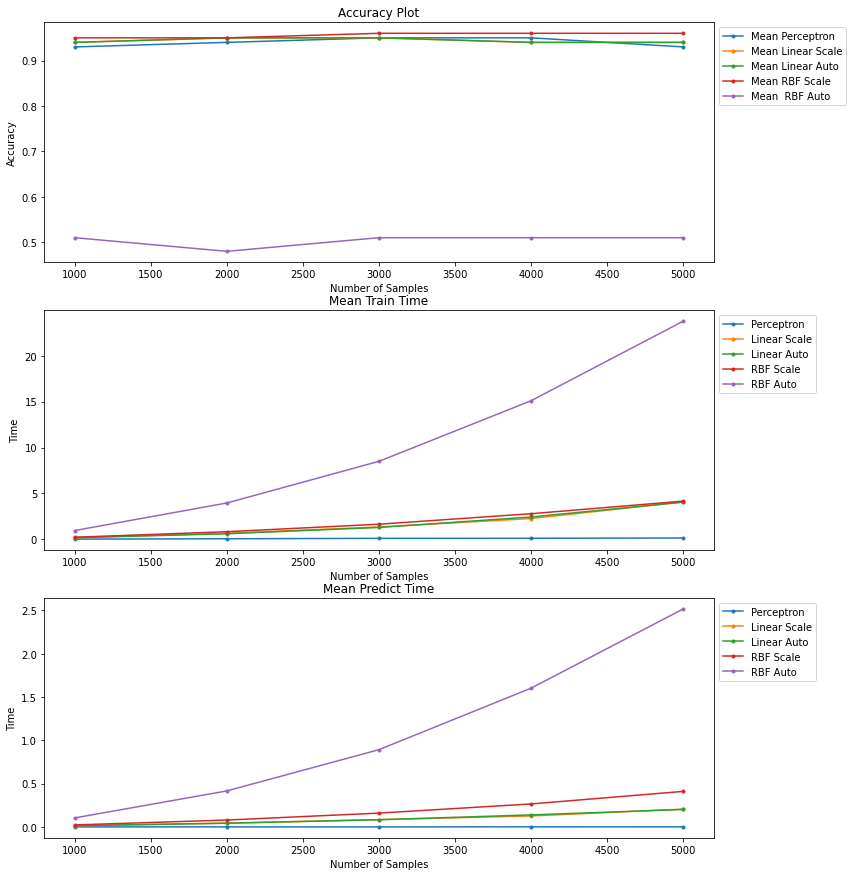

In [98]:
#plotting results
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

axes[0].plot(per_range,per_acc, ".-", label= "Mean Perceptron")
axes[0].plot(lin_scale_range,lin_scale_acc, ".-", label= "Mean Linear Scale") #mean acc scores
axes[0].plot(lin_auto_range,lin_auto_acc, ".-", label= "Mean Linear Auto")
axes[0].plot(rbf_scale_range,rbf_scale_acc, ".-", label= "Mean RBF Scale")
axes[0].plot(rbf_auto_range,rbf_auto_acc, ".-", label= "Mean  RBF Auto")
axes[0].set_title("Accuracy Score")
axes[0].set_xlabel('Number of Samples')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Plot')
axes[0].legend(bbox_to_anchor=(1, 1))

axes[1].plot(per_range,per_train, ".-", label = "Perceptron")
axes[1].plot(lin_scale_range,lin_scale_train, ".-", label = "Linear Scale") #mean train time
axes[1].plot(lin_auto_range,lin_auto_train, ".-", label = "Linear Auto")
axes[1].plot(rbf_scale_range,rbf_scale_train, ".-", label = "RBF Scale")
axes[1].plot(rbf_auto_range,rbf_auto_train, ".-", label = "RBF Auto")
axes[1].set_title("Mean Train Time")
axes[1].set_xlabel('Number of Samples')
axes[1].set_ylabel('Time')
axes[1].legend(bbox_to_anchor=(1, 1))

axes[2].plot(per_range,per_predict, ".-", label = "Perceptron")
axes[2].plot(lin_scale_range,lin_scale_predict, ".-", label = "Linear Scale")
axes[2].plot(lin_auto_range,lin_auto_predict, ".-", label = "Linear Auto") #mean predict time
axes[2].plot(rbf_scale_range,rbf_scale_predict, ".-", label = "RBF Scale")
axes[2].plot(rbf_auto_range,rbf_auto_predict, ".-", label = "RBF Auto")
axes[2].set_title("Mean Predict Time")
axes[2].set_xlabel('Number of Samples')
axes[2].set_ylabel('Time')
axes[2].legend(bbox_to_anchor=(1, 1))

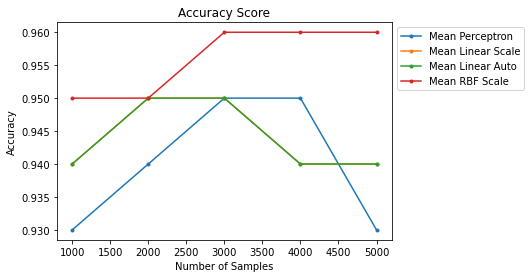

In [97]:
#plot exluding RBF AUTO
plt.plot(per_range,per_acc, ".-", label= "Mean Perceptron")
plt.plot(lin_scale_range,lin_scale_acc, ".-", label= "Mean Linear Scale")
plt.plot(lin_auto_range,lin_auto_acc, ".-", label= "Mean Linear Auto")
plt.plot(rbf_scale_range,rbf_scale_acc, ".-", label= "Mean RBF Scale")
plt.title("Accuracy Score")
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))